## Assignment 6 - Unit Test Your Functions!

Follow the instructions in the following notebook cell. You will be graded on:

    - Whether your unit tests are passing
    - The completion of this notebook

## Part 1:

In [1]:
# import the stuff you need here: os, glob, natsort, numpy, matplotlib.pyplot, pandas:
%load_ext autoreload
%autoreload 2

# example import, don't edit this.
import sys
sys.path.append('../')   # appending your project to python path

# import the rest: 
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt 
import numpy as np

#### Data I/O:

First, in the `utils.py` file from the `functions` folder, recreate the function to get all the `.csv` data files:

```python
def get_files(path_pattern):
    Given a `path_pattern` describing the path to all your data files, sorts the matching data files in alphanumerical order and returns a list with all file paths.

    Input: 
        path_pattern (list): Path to all data files as described by a wildcard (*)
    Returns:
        files (list): Alphanumerical sorted list of all data files matching your path_pattern description.
```

Import it using relative imports and use it in the following cells to load your data. Remember `.`

In [2]:

# first import your utility function:
from functions.utils import get_files1

# Provide the wildcard (*) string pattern for your data files:
data_pattern = "data/*.csv"


# Use your utilities function to read and return a list of sorted data files: 
data_files = get_files1(data_pattern)
print('There are {} data csv files in the data folder'.format(len(data_files)))





There are 56 data csv files in the data folder


In [3]:
!pip install natsort

### Create DataFrame:

Use `pandas` to load your `.csv` file data and turn them into a `dataframe`, then display the first 5 entries of your `dataframe`:

In [4]:
# read in your csv files, concatenate all the csv's one by one into columns, and replace empty entries with 0's

df= pd.concat([pd.read_csv(f, usecols=['Value']) for f in data_files], axis=1).fillna(0)
df.shape

# assign column numbers to your data frame
df.columns = np.arange(df.shape[1])

# Show the first 5 entries of your dataframe:
df [0: 5] 


,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,305.119,299.585,284.134,274.030,259.498,258.587,261.424,274.786,271.133,259.844,...,274.816,266.868,258.534,252.913,262.916,255.959,272.325,247.210,291.965,260.800
1,311.217,303.344,285.376,279.933,259.565,258.002,261.486,272.011,278.229,257.284,...,275.208,267.729,257.029,250.244,261.190,260.099,282.765,248.638,296.283,262.489
2,326.685,306.195,289.555,279.445,257.737,261.400,259.558,275.921,278.489,262.490,...,278.905,269.762,256.576,252.016,260.797,264.321,288.183,249.163,298.079,263.869
3,334.542,315.992,291.688,285.562,265.585,271.941,257.475,273.572,277.763,263.175,...,286.011,274.107,255.490,255.307,259.653,269.742,287.018,253.169,300.793,266.294
4,336.459,328.338,294.633,292.300,268.526,274.761,259.245,278.288,284.147,259.553,...,290.311,284.979,257.433,252.361,262.665,275.553,282.375,255.589,303.503,268.537


### Realign our dataframes so we match the peak fluorescent signals:

In `functions.utils.py`, add the following functions:

 - `find_middle()` - find the middle index of input data column and returns it
 - `realign_data()` - Center data around maximum or center of shortest column, padding with 0's, returns 1) a new dataframe with realigned columns and 2) the amount each column was shifted

In `tests` folder, create a file named `test_utils.py` and add the following unit tests functions:

 - `test_find_middle_even()` - 
 - `test_find_middle_odd()` - 
 - `test_realign_max()` - 

Use your terminal to test these functions with `pytest assignment/tests`. Once all your tests are passing, import the functions and use them in the following cells:

In [23]:
# from functions.utils import get_files1

from functions.utils import realign_data

import functions.utils 
reload (functions.utils)
print (dir(functions.utils))

# realign your data around its maximum or center, whichever one you like better: 
df_aligned, shifts = functions.utils.realign_data(df)

print('My realigned data frame has shape {}'.format(df_aligned.shape))



df_aligned, shifts = realign_data(df, "max")


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'find_middle', 'get_files', 'get_files1', 'glob', 'natsort', 'np', 'os', 'pd', 'realign_data']
15
My realigned data frame has shape (65, 56)
15


In [24]:
!pip install sklearn

### Normalize signal and visualize:

Now we can normalize each column between 0-1 using `scikitlearn`'s `minmaxscale` function and visualize them. <em> In your plots, properly label all axis and colorbars with appropriate name description and units:

In [25]:
from sklearn.preprocessing import MinMaxScaler




df_normalized = pd.DataFrame(columns = df_aligned.columns)
scaler = MinMaxScaler()


for column, vals in df_aligned.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned.index[df_aligned[column]!=0].tolist()
    df_normalized[column] = vals[ind]

scaler.fit(df_normalized)
    
normalized_array = scaler.transform(df_normalized)
df_normalized = pd.DataFrame(normalized_array, columns = df_aligned.columns).fillna(0)




# Normalize every column entry of your realigned dataframe:

# pre-allocate an empty dataframe of 0's to be filled with normalized values, the index and column of this dataframe will be the same as the df_aligned dataframe:

#df_normalized = pd.DataFrame(normalized_array, columns = df_aligned.columns)


# fill in the `df_normalized` dataframe with normalized columns:

    # Normalize of those:




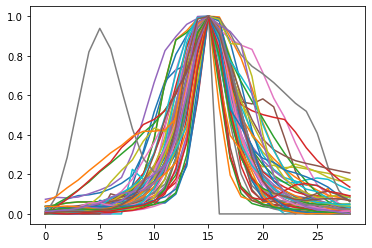

In [26]:

# Use matplotlib to plot all the fluorescent signals:
plt.plot(df_normalized)


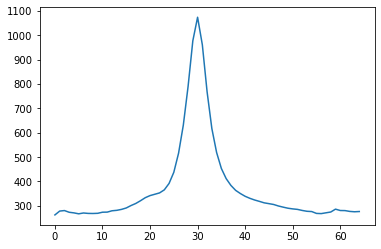

In [27]:

# Now instead of all signals, plot the average signal:
# use numpy to find the mean first:
mean_signal = np.zeros(df_aligned.shape[0])
for index, row in df_aligned.iterrows():
    val = row[row != 0] 
    mean_signal[index] = np.mean(val)

#plot
plt.plot(mean_signal)

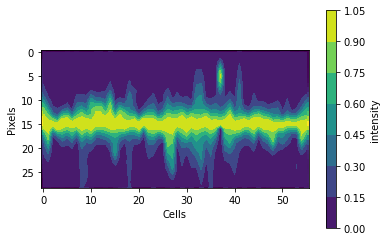

In [28]:
# Finally visualize your aligned, and normalized fluorescent data in a heatmap:

cntr = plt.contourf(df_normalized)
cbar=plt.colorbar(cntr)

#Heatmap:
plt.imshow(df_normalized.values)
plt.xlabel('Cells')
plt.ylabel('Pixels')
cbar.set_label('intensity')



## Part 2:

Repeat the analysis, but instead of realigning the fluorescent signals to it's maximum peaks. Modify the `realign_data` function so that it requires a second input named `aligned`. In the function, if `align == "max"`, the code executes the max peak alignment like before.

But if `align == "center"`, the function will find the mid point of `input_data[column ! = 0]`, the middle index of non-zero values. Then shifts the values according to the new criteria.

After adding this feature to `functions.utils.realign_data`, write the appropriate test for this new feature in `tests.test_utils.py`, make sure this test is passing. Then implement the new alignment and revisualize the results, again making sure all axis and colorbars are properly labeled:

In [29]:
# apply your new realignment here

df_aligned_center, shifts = functions.utils.realign_data(df, align = "center")

df_normalized = pd.DataFrame(columns = df_aligned_center.columns)



# fill in the `df_normalized` dataframe with normalized columns:
for column, vals in df_aligned_center.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned_center.index[df_aligned_center[column]!=0].tolist()
    df_normalized[column] = vals[ind]
    # Normalize of those:


scaler = MinMaxScaler()
scaler.fit(df_normalized)
normalized_array = scaler.transform(df_normalized)


df_normalized = pd.DataFrame(normalized_array, columns = df_aligned_center.columns).fillna(0) 




15


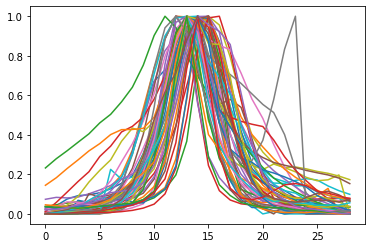

In [30]:
# visualize all of the newly aligned data
plt.plot(df_normalized)

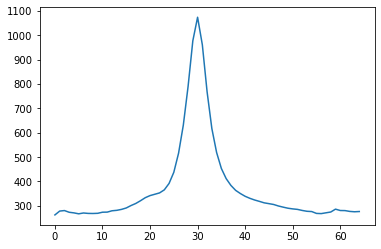

In [31]:
# visualize the mean of the newly aligned data

mean_signal = np.zeros(df_aligned.shape[0])
for index, row in df_aligned.iterrows():
    val = row[row != 0] 
    mean_signal[index] = np.mean(val)

#plot
plt.plot(mean_signal)

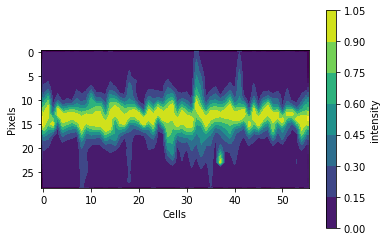

In [32]:
# visualize the heatmap 
cntr = plt.contourf(df_normalized)
cbar=plt.colorbar(cntr)

#Heatmap:
plt.imshow(df_normalized.values)
plt.xlabel('Cells')
plt.ylabel('Pixels')
cbar.set_label('intensity')

Lastly, push your submission branch, the `pytests` should automatically be executed upon your push. Make sure these tests are passing! Again, add me as a collaborator, and a reviewer in your pull request that merges `submission` into `main`. 